Agenda:
- 简单分类器
- 逻辑回归分类，logistics regression classifer
- 朴素贝叶斯分类, naive bayes classifier
- 交叉验证, cross validation
- 混肴矩阵, confusion matrix
- 模型性能报告, model performance
- Random Forest Classifier - 根据汽车特征评估质量
- 模型验证曲线, validation curve (超参数遍历+交叉验证 = DOE矩阵计算结果)
- 学习曲线，learning curve

#### 简单分类器

Out[1]: [<matplotlib.lines.Line2D at 0x7fc7508d9dc0>]

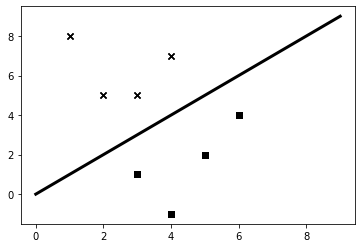

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# input data
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])

# labels
y = [0, 1, 1, 0, 0, 1, 1, 0]

# separate the data into classes based on 'y'
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

# plot input data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')

# draw the separator line
line_x = range(10)
line_y = line_x

# plot labeled data and separator line 
# plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.plot(line_x, line_y, color='black', linewidth=3)

# plt.show()

#### 逻辑回归分类-logistic regression classifer
- 对给定的数据点，建立一个可以在类之间绘制线性边界的模型
- 对训练数据派生的一组方程进行求解来提取边界
- LR原理上只用于二分类；实际应用过程采取OVR(one .vs rest)的思想，应用于多分类问题

<command-1580345817290325>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.tab10)
[0 0 0 1 1 1 2 2 2]


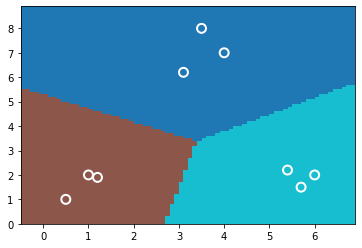

In [0]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt

# 创建一些带训练标记的样本数据,三个类别
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# initialize the logistic regression classifier
# solver - 设置求解系统方程的算法类型
# C - 表示正则化的强度，数值越大，正则化的强度越高，分类错误的惩罚值越高。C的值越大，每个类别的分类边界更优
classifier = linear_model.LogisticRegression(solver='liblinear', C=100000)

# train the classifier
classifier.fit(X, y)

# 可视化分类结果
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure - 设置可视化边界+1
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid - 设置可视化图片像素颗粒度
    step_size = 0.1

    # define the mesh grid
    # 为了画出边界，需要利用一组网格(grid)数据求出方程的值，然后把分类边界画出来
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    # np.c_ 中的c 是 column(列)的缩写，就是按列叠加两个矩阵，就是把两个矩阵左右组合
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()
#     print(mesh_output)
    
    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.tab10)
    
    print(y)
    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='white', linewidth=2, cmap=plt.cm.tab10)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

#     plt.show()


# draw datapoints and boundaries
plot_classifier(classifier, X, y)

#### 朴素贝叶斯分类器-Naive Bayes
- 贝叶斯定理进行建模的监督学习分类器
- 朴素贝叶斯算法（Naive Bayesian) 是应用最为广泛的分类算法之一
- 朴素贝叶斯方法是在贝叶斯算法的基础上进行了相应的简化，即假定给定目标值时属性之间相互条件独立。也就是说没有哪个属性变量对于决策结果来说占有着较大的比重，也没有哪个属性变量对于决策结果占有着较小的比重。虽然这个简化方式在一定程度上降低了贝叶斯分类算法的分类效果，但是在实际的应用场景中，极大地简化了贝叶斯方法的复杂性
- 朴素贝叶斯分类（NBC）是以贝叶斯定理为基础并且假设特征条件之间相互独立的方法，先通过已给定的训练集，以特征词之间独立作为前提假设，学习从输入到输出的联合概率分布，再基于学习到的模型，输入X求出使得后验概率最大的输出y

In [0]:
# spark读取DBFS中txt文件
df = spark.read.text('/FileStore/tables/data_multivar-1.txt')

# txt文件中所有数据会自动到dataframe中的一列
df1 = df.toPandas()

# 将txt中文本格式的数据，通过逗号来拆分开，并保留为string格式
df1['a'], df1['b'], df1['y'] = df1['value'].str.split(',', 3).str
df1.head()

# 删除txt原始的合并列
df1 = df1.drop('value',axis=1)

# 将需要用到模型训练的字段，数据格式转化为float
df1[['a','b','y']] = df1[['a','b','y']].astype('float')
df1[['y']] = df1[['y']].astype('int')

# 查看dataframe数据格式
print(df1.dtypes)

df1

a    float64
b    float64
y      int64
dtype: object
<command-1580345817290329>:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['a'], df1['b'], df1['y'] = df1['value'].str.split(',', 3).str


,a,b,y
0,8.73,0.31,2
1,4.71,-0.42,3
2,4.58,6.18,1
3,9.38,2.18,2
4,4.78,5.28,1
...,...,...,...
395,5.00,0.85,3
396,6.01,4.03,1
397,1.20,2.19,0
398,0.13,2.06,0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [0]:
X=np.array(df1.iloc[:,:-1])
y=np.array(df1.iloc[:,-1])

classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

# compute accuracy of the classifier
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")


y.shape
type(X[:,0])

Accuracy of the classifier = 99.5 %
Out[5]: numpy.ndarray

<command-3010826416435967>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.tab20c)


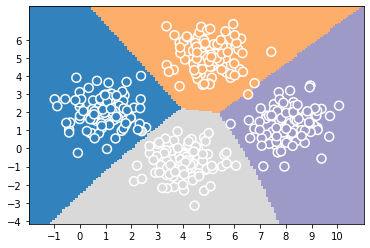

In [0]:
# 可视化分类结果
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure - 设置可视化边界+1
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid - 设置可视化图片像素颗粒度
    step_size = 0.1

    # define the mesh grid
    # 为了画出边界，需要利用一组网格(grid)数据求出方程的值，然后把分类边界画出来
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    # np.c_ 中的c 是 column(列)的缩写，就是按列叠加两个矩阵，就是把两个矩阵左右组合
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()
    
#     print(mesh_output)
    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.tab20c)
    
#     print(y)
    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='white', linewidth=1.5, cmap=plt.cm.tab20c)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

#     plt.show()


# draw datapoints and boundaries
plot_classifier(classifier_gaussiannb, X, y)

#### 训练集和测试集自动拆分

Accuracy of the classifier = 98.0 %
<command-3010826416435967>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.tab20c)


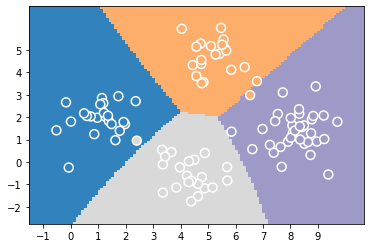

In [0]:
# Train test split (在sklearn = 0.18版本之后，cross_validation被废弃，取而代之的是model_selection)
from sklearn import model_selection

# 25%-测试数据，75%-训练数据
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb_new.predict(X_test)

# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

plot_classifier(classifier_gaussiannb_new, X_test, y_test)

#### 交叉验证 - Cross Validation
- 为了让模型更稳定，需要用数据集的不同自己来反复验证模型性能
- 模型性能评估常用指标：精度-precision，召回率-recall，F1 score
- F1 score是精度和召回率的调和均值(harmonic mean). F1 score = 2 * precision * recall / (precision + recall)
- k折交叉验证的步骤：
  - 将数据集均分成k份 
  - 不重复地每次取一份作为测试集，其余做训练集，之后分别计算测试集的MSE等model metrics 
  - 将k次的MSE取平均得到最终的MSE值

In [0]:
# Cross validation and scoring functions

num_validations = 5 # cv_number的选取是一个Bias和Variance的trade-off，一般选5或10

# 常用metrics scoring计算方法
accuracy = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='accuracy', cv=num_validations)
f1 = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='f1_weighted', cv=num_validations)
precision = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='precision_weighted', cv=num_validations)
recall = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='recall_weighted', cv=num_validations)

# 输出结果
print('\n**** Classifier_gaussiannb: ****\n')
print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")
print("F1: " + str(round(100*f1.mean(), 2)) + "%")
print("Precision: " + str(round(100*precision.mean(), 2)) + "%")
print("Recall: " + str(round(100*recall.mean(), 2)) + "%")


**** Classifier_gaussiannb: ****

Accuracy: 99.5%
F1: 99.5%
Precision: 99.52%
Recall: 99.5%


#### 混淆矩阵-Confusion Matrix
- 是理解分类模型性能的数据表，有助于帮助理解模型如何把数据分成不同的类
- 了解数据被错误分类的情况，便于找到模型优化的切入点

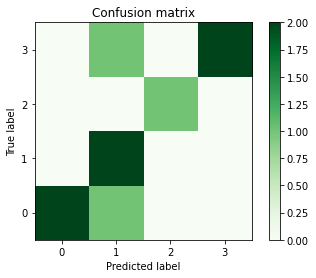

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Show confusion matrix
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', origin='lower', cmap=plt.cm.Greens)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_mat) # 从结果看，混淆矩阵对角线的颜色越深，分类的效果越好

In [0]:
# Print classification report - 直接输出模型性能metrics
from sklearn.metrics import classification_report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



#### 随机森林分类 - Random Forest Classifier
- 实例：根据汽车特征评估汽车质量（根据车门数量，后备箱大小，维修成本等来确定汽车质量。最后分为不达标，达标，良好，优秀四个评级）
- 随机森林既可以做回归，又可以做分类

In [0]:
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [0]:
# spark读取DBFS中txt文件
df = spark.read.text('/FileStore/tables/car_data.txt')

# txt文件中所有数据会自动到dataframe中的一列
df1 = df.toPandas()

# 将txt中文本格式的数据，通过逗号来拆分开，并保留为string格式
df1['buying'], df1['maint'], df1['doors'], df1['persons'], df1['lug_boot'], df1['safety'], df1['quality'] = df1['value'].str.split(',', 6).str
df1.head()

# 删除txt原始的合并列
df1 = df1.drop('value',axis=1)

# # 将需要用到模型训练的字段，数据格式转化为float
# df1[['a','b','y']] = df1[['a','b','y']].astype('float')
# df1[['y']] = df1[['y']].astype('int')

# 查看dataframe数据格式
print(df1.dtypes)

df1

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
quality     object
dtype: object
<command-3846976519372693>:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['buying'], df1['maint'], df1['doors'], df1['persons'], df1['lug_boot'], df1['safety'], df1['quality'] = df1['value'].str.split(',', 6).str


,buying,maint,doors,persons,lug_boot,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [0]:
X = np.array(df1)
X

# Convert string data to numerical data
label_encoder = [] 

# empty(shape[, dtype, order]) 依给定的shape, 和数据类型 dtype,  返回一个一维或者多维数组，数组的元素不为空，为随机产生的数据。
X_encoded = np.empty(X.shape)


# enumerate - 枚举遍历
for i,item in enumerate(X[0]):
#     print(X[0])
#     print(i)
#     print(item)
#     print(X[:,i].shape)
    
    label_encoder.append(preprocessing.LabelEncoder())
#     print(X[:,i])
#     print('---')
    X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])
    
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)


# Build a Random Forest classifier
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
classifier = RandomForestClassifier(**params)
classifier.fit(X, y)

# Cross validation - 交叉验证
from sklearn import model_selection

accuracy = model_selection.cross_val_score(classifier, X, y, scoring='accuracy', cv=3)
print("Accuracy of the classifier: " + str(round(100*accuracy.mean(), 2)) + "%")

# # **********************************************************************
# # Testing encoding on single data instance
# input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
# input_data_encoded = [-1] * len(input_data)

# for i,item in enumerate(input_data):
# #     input_data_encoded[i] = int(label_encoder[i].transform(input_data[i]))
#     print(input_data)
#     print(i)
# #     print(item)
# #     print(input_data[i].shape)
#     input_data[i] = np.array(input_data[i]).reshape(-1)
#     print(input_data[i])
#     input_data_encoded[i] = label_encoder[-1].transform(input_data[i])

# input_data_encoded = np.array(input_data_encoded)

# # Predict and print output for a particular datapoint
# output_class = classifier.predict(input_data_encoded)
# print("Output class:", label_encoder[-1].inverse_transform(output_class)[0])
# # **********************************************************************

Accuracy of the classifier: 77.66%


#### 验证曲线 - Validation Curve

/databricks/python/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_estimators, param_range=[  5  15  25  35  46  56  66  76  87  97 107 117 128 138 148 158 169 179
 189 200] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "

***** VALIDATION CURVES *****

Param: n_estimators
Training scores:
 [[0.76917511 0.83719247 0.77279305 0.7758496  0.78308026]
 [0.80680174 0.81476122 0.80607815 0.78741866 0.81055676]
 [0.80680174 0.80824891 0.80752533 0.80694143 0.81055676]
 [0.79232996 0.80607815 0.81114327 0.81055676 0.80911063]
 [0.7959479  0.80535456 0.81041968 0.81127983 0.81344902]
 [0.80390738 0.80463097 0.81186686 0.81344902 0.81055676]
 [0.79522431 0.80535456 0.81114327 0.80983369 0.81055676]
 [0.79884226 0.80680174 0.81114327 0.80911063 0.81417209]
 [0.80535456 0.80535456 0.81186686 0.80694143 0.80983369]
 [0.8031

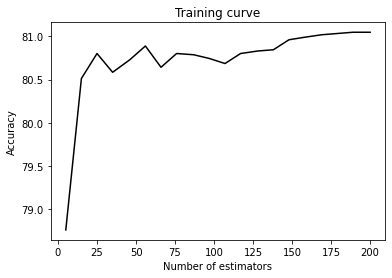

In [0]:
# 生成验证曲线 - validation curve. 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
# 通过调整两个主要超参数(hyperparameters): n_estimators, max_depth来体现模型的性能，帮助理解每个超参数对训练得分的影响

# 固定max_depth值，对n_estimators参数进行验证：
from sklearn.model_selection import validation_curve

classifier = RandomForestClassifier(max_depth=4, random_state=7)

# 创建分段的等差序列，定义超参数的分布区间
parameter_range = np.linspace(5, 200, 20).astype(int)

train_scores, validation_scores = validation_curve(classifier, X, y, "n_estimators", parameter_range, cv=5)
print("\n***** VALIDATION CURVES *****")
# 返回数组结果 → arrayz_of_shape(n_ticks, n_cv_folds)
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

# Plot the curve
plt.figure()
plt.plot(parameter_range, 100*np.average(train_scores, axis=1), color='black') # np.average(..axis=1) - 矩阵的行均值
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

/databricks/python/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=[ 2  3  4  6  7  9 10 12 13 15] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "

***** VALIDATION CURVES *****

Param: max_depth
Training scores:
 [[0.71852388 0.70043415 0.70043415 0.69992769 0.69992769]
 [0.79811867 0.76193922 0.75832127 0.76861894 0.76934201]
 [0.80607815 0.80535456 0.80752533 0.80043384 0.80694143]
 [0.90665702 0.91027496 0.92836469 0.89949385 0.90310918]
 [0.9602026  0.95224313 0.95441389 0.95010846 0.95661605]
 [0.9804631  0.98769899 0.98118669 0.99204628 0.98770788]
 [0.99421129 0.99710564 0.99782923 1.         0.99349241]
 [1.         1.         1.         1.         0.99927693]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]

Param

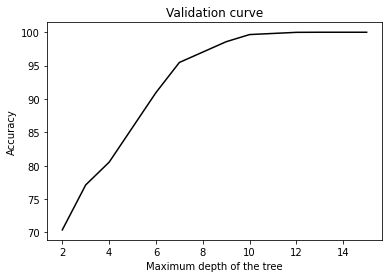

In [0]:
# 固定n_estimators值，对max_depth参数进行验证： 
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_range = np.linspace(2, 15, 10).astype(int)

train_scores, valid_scores = validation_curve(classifier, X, y,"max_depth", parameter_range, cv=5)
print("\n***** VALIDATION CURVES *****")
print("\nParam: max_depth\nTraining scores:\n", train_scores)
print("\nParam: max_depth\nValidation scores:\n", validation_scores)

# Plot the curve
plt.figure()
plt.plot(parameter_range, 100*np.average(train_scores, axis=1), color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

#### 学习曲线 - Learning Curve


***** LEARNING CURVES *****

Training sizes:
 [   1   71  142  213  284  355  426  497  568  638  709  780  851  922
  993 1064 1135 1206 1276 1347]

Training scores:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Validation scores:
 [[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.67919075 0.82369942 0.69942197 0.74492754 0.70144928]
 [0.63583815 0.76878613 0.72254335 0.76811594 0.70144928]
 [0.65606936 0.70809249 0.77456647 0.76811594 0.70144928]
 [0.70520231 0.78034682 0.77456647 0.768115

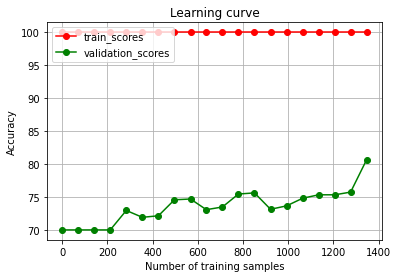

In [0]:
# Learning curves
# 学习曲线帮助理解数据集大小对机器学习模型的影响。尤其是算力有限时，需要平衡考虑。学习曲线就是通过画出不同训练集大小时训练集和交叉验证的准确率，可以看到模型在新数据上的表现，进而来判断模型是否方差偏高或偏差过高，以及增大训练集是否可以减小过拟合。

from sklearn.model_selection import learning_curve

classifier = RandomForestClassifier()
# classifier = RandomForestClassifier(random_state=7)

# parameter_grid = np.array([50, 100, 200, 500, 800, 1100, 1300])
parameter_grid = np.linspace(1, 0.78*len(X), 20).astype(int)
train_sizes, train_scores, validation_scores = learning_curve(classifier, X, y, train_sizes=parameter_grid, cv=5)
print("\n***** LEARNING CURVES *****")
print("\nTraining sizes:\n", train_sizes)
print("\nTraining scores:\n", train_scores)
print("\nValidation scores:\n", validation_scores)

# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='red', marker='o')
plt.plot(parameter_grid, 100*np.average(validation_scores, axis=1), color='green', marker='o')

plt.legend(["train_scores", "validation_scores"], loc ="upper left") 
plt.grid()
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()

#### 实例：估算收入阶层
- Naive Bayes，GaussianNB

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [0]:
# spark读取DBFS中txt文件
df = spark.read.text('/FileStore/tables/adult_data.txt')

# txt文件中所有数据会自动到dataframe中的一列
df1 = df.toPandas()

# 将txt中文本格式的数据，通过逗号来拆分开，并保留为string格式
expand_df = df1['value'].str.split(',', expand=True)
expand_df

# 暴力字典法 - 批量遍历修改数据集的列名
new_dict = {key:'column'+'_'+str(i) for i, key in enumerate(expand_df.columns)}
expand_df.rename(columns=new_dict, inplace=True)

expand_df

# 此时dataframe的每个值前都有个空格，需要进一步做预处理。是由于split操作导致的
# strip() - 删除开头和结尾的空格
def delete_space(x):
    if type(x) is str:
        return x.strip()
    else:
        return x
    
expand_df1 = expand_df.applymap(delete_space)

# str类型数据转化为numeric
lst_to_num = ['column_0', 'column_2', 'column_4', 'column_10', 'column_11', 'column_12']
for i in lst_to_num:
    expand_df1[i] = pd.to_numeric(expand_df1[i])
    
expand_df1

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
32560,52.0,Self-emp-inc,287927.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,>50K


In [0]:
# print(expand_df1['column_14'].value_counts())

# 平衡样本类别数量，保证初始类型没有偏差。两种类别各取相同的样本点。导入数据
X = []
y = []
count_lessthan50k = 0
count_morethan50k = 0
num_images_threshold = 7800

for i in range(len(expand_df1)):
    
    if expand_df1.iloc[i,-1] == '<=50K' and count_lessthan50k < num_images_threshold:
#         print(i)
        X.append(expand_df1.iloc[i,:])
        
        count_lessthan50k = count_lessthan50k + 1
        
    elif expand_df1.iloc[i,-1] == '>50K' and count_morethan50k < num_images_threshold:
        X.append(expand_df1.iloc[i,:])
        count_morethan50k = count_morethan50k + 1
        
    if count_lessthan50k >= num_images_threshold and count_morethan50k >= num_images_threshold:
        break

        
X = np.array(X)
print(X[0])

# 转化str类型数据到数值型
label_encoder = [] 
X_encoded = np.empty(X.shape)
count1 = 0
for i,item in enumerate(X[0]):
    if type(item) is not str: 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[count1].fit_transform(X[:, i])
        count1+=1
        
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)



# Build a classifier
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)

# Cross validation
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb.predict(X_test)

# compute F1 score of the classifier
f1 = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='f1_weighted', cv=5)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

[39.0 'State-gov' 77516.0 'Bachelors' 13.0 'Never-married' 'Adm-clerical'
 'Not-in-family' 'White' 'Male' 2174.0 0.0 40.0 'United-States' '<=50K']
F1 score: 58.78%


In [0]:
# Testing encoding on single data instance
# input_data = np.array(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States'])

test_dataset = np.array(expand_df1.iloc[0:2,:-1])

count = 0
# input_data_encoded = [-1] * len(input_data)
input_data_encoded = np.empty(test_dataset.shape)

for i,item in enumerate(test_dataset[0]):
    
#     print(i)
#     print(item)
    
    if type(item) is not str:
#         print('not str')
#         print(item)
#         print(test_dataset[:,i])
#         print('---')
        input_data_encoded[:,i] = test_dataset[:,i]
    else:
#         print('str')
#         print(item)
#         print(test_dataset[:,i])
#         print('---')
        input_data_encoded[:,i] = (label_encoder[count].transform(test_dataset[:,i]))
        count = count + 1

# input_data_encoded = np.array(input_data_encoded)
# Predict and print output for a particular datapoint
output_class = classifier_gaussiannb.predict(input_data_encoded)
print(label_encoder[count].inverse_transform(output_class))

['<=50K' '<=50K']


Out[21]: [LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]